In [1]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import your integration methods
from pyACC.Calculus import *

# Import integration class
from pyACC.cosmology import *

import scipy as sp
from scipy import interpolate
from scipy.misc import derivative

from random import randint

import corner
import pygtc
import getdist

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

In [2]:
#apertura dei file

data = open('SNIa_data.txt', 'r')
covariance = open('SNIa_covariance.txt', 'r')

In [3]:
#lettura dei file e costruzione di matrice di covarianza (sigma), vettore di dati con redshift e magnitudini

sigma = np.array(np.loadtxt("SNIa_covariance.txt"))
measures = np.array(np.loadtxt("SNIa_data.txt"))
redshift = np.array(measures[:,0])
magnitude = np.array(measures[:,1])

sigma_inv = np.array(np.linalg.inv(sigma))

# Con Loglikelihood

In [4]:
#ciclo che per ogni valore del parametro O_m calcola la likelihood

def logL(Om,wde):
    Ode = 1 - Om
    mu = distance_modulus(z=redshift, H_0=67.0, O_m=Om, O_gam=0, O_nu=0, O_de=Ode, w_de=wde)
    x_mu = magnitude - mu
    ones = np.ones(len(redshift))
   
    return -(1./2)*np.linalg.multi_dot([x_mu, sigma_inv, x_mu])+(1./2)*((np.linalg.multi_dot([ones, sigma_inv, x_mu]))**2)/(np.linalg.multi_dot([ones, sigma_inv, ones]))


In [5]:
# flat proposal

# target distribution
target = lambda Om,wde: logL(Om,wde)

'''
n_integration_inf_H0 = 1.0
n_integration_sup_H0 = 100.0
n_integration_inf_Om = 0.01
n_integration_sup_Om = 2.00

# normalization
norm = pdf.Integrate([n_integration_inf_H0,n_integration_inf_Om],[n_integration_sup_H0,n_integration_sup_Om])
norm_diff = pdf_diff.Integrate([n_integration_inf_H0,n_integration_inf_Om],[n_integration_sup_H0,n_integration_sup_Om])
target = lambda H0,Om: (1/norm)*fun(H0,Om)
target_diff = lambda H0,Om: (1/norm_diff)*fun_diff(H0,Om)

print(norm)
print(norm_diff)
'''

'\nn_integration_inf_H0 = 1.0\nn_integration_sup_H0 = 100.0\nn_integration_inf_Om = 0.01\nn_integration_sup_Om = 2.00\n\n# normalization\nnorm = pdf.Integrate([n_integration_inf_H0,n_integration_inf_Om],[n_integration_sup_H0,n_integration_sup_Om])\nnorm_diff = pdf_diff.Integrate([n_integration_inf_H0,n_integration_inf_Om],[n_integration_sup_H0,n_integration_sup_Om])\ntarget = lambda H0,Om: (1/norm)*fun(H0,Om)\ntarget_diff = lambda H0,Om: (1/norm_diff)*fun_diff(H0,Om)\n\nprint(norm)\nprint(norm_diff)\n'

In [6]:
# sampling
Om_point = 0.3
wde_point = -1.0
point0 = np.array([Om_point,wde_point])
N = 10000
dss = np.array([0.01, 0.01])

sample_f, eff_f = sampler.Metropolis_Hastings(target, x0=point0, N=N, ds=dss, log=True)

Metropolis-Hastings (flat):   2%|▏         | 175/10000 [00:51<48:19,  3.39it/s]


KeyboardInterrupt: 

In [ ]:
Om_sample_f = sample_f[:,0]
wde_sample_f = sample_f[:,1]

In [ ]:
names = ["\Omega_m","w_{de}"]
labels = ["\Omega_m","w_{de}"]

samples_f = getdist.mcsamples.MCSamples(samples=sample_f,names = names, labels = labels, label='Flat proposal')

Removed no burn in


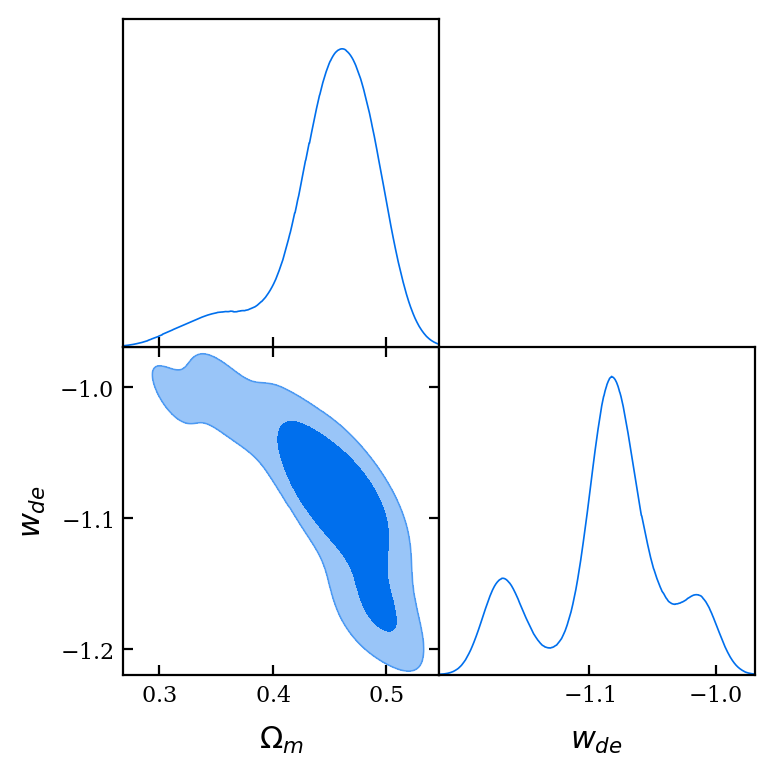

In [ ]:
from getdist import plots
g = plots.get_subplot_plotter()
g.triangle_plot(samples_f, filled=True)

In [ ]:
mean_f = np.array([np.mean(Om_sample_f),np.mean(wde_sample_f)])

mode_f = np.array([sp.stats.mode(Om_sample_f)[0],sp.stats.mode(wde_sample_f)[0]])

median_f = np.array([np.median(Om_sample_f),np.median(wde_sample_f)])

std_f = np.array([np.std(Om_sample_f),np.std(wde_sample_f)])

cov_f = np.array(np.cov(Om_sample_f,wde_sample_f))

In [ ]:
print("Flat proposal:")
print("Mean Omega_m = ", mean_f[0], "       w_de = ", mean_f[1])
print("Mode Omega_m = ", mode_f[0], "       w_de = ", mode_f[1])
print("Median Omega_m = ", median_f[0], "       w_de = ", median_f[1])
print("Standard deviation Omega_m = ", std_f[0], "       w_de = ", std_f[1])
print("Covariance Omega_m - w_de = ", cov_f)

Flat proposal:
Mean Omega_m =  0.4499265202676968        w_de =  -1.0869190898808552
Mode Omega_m =  0.3674177040872267        w_de =  -1.017846586139881
Median Omega_m =  0.45499572219489937        w_de =  -1.0821863259476405
Standard deviation Omega_m =  0.044329678798355095        w_de =  0.048415316709088094
Covariance Omega_m - w_de =  [[ 0.00196906 -0.00172153]
 [-0.00172153  0.00234874]]


In [ ]:
# sampling
Om_point = 0.3
wde_point = -1.0
point0 = np.array([Om_point,wde_point])
N = 10000
dss = np.array([0.01, 0.01])

sample_f_2, eff_f_2 = sampler.Metropolis_Hastings(target, x0=point0, N=N, ds=dss, log=True)

In [ ]:
Om_sample_f_2 = sample_f_2[:,1]
wde_sample_f_2 = sample_f_2[:,0]

In [ ]:
samples_f_2 = getdist.mcsamples.MCSamples(samples=sample_f_2,names = names, labels = labels, label='Flat proposal 2')

Removed no burn in


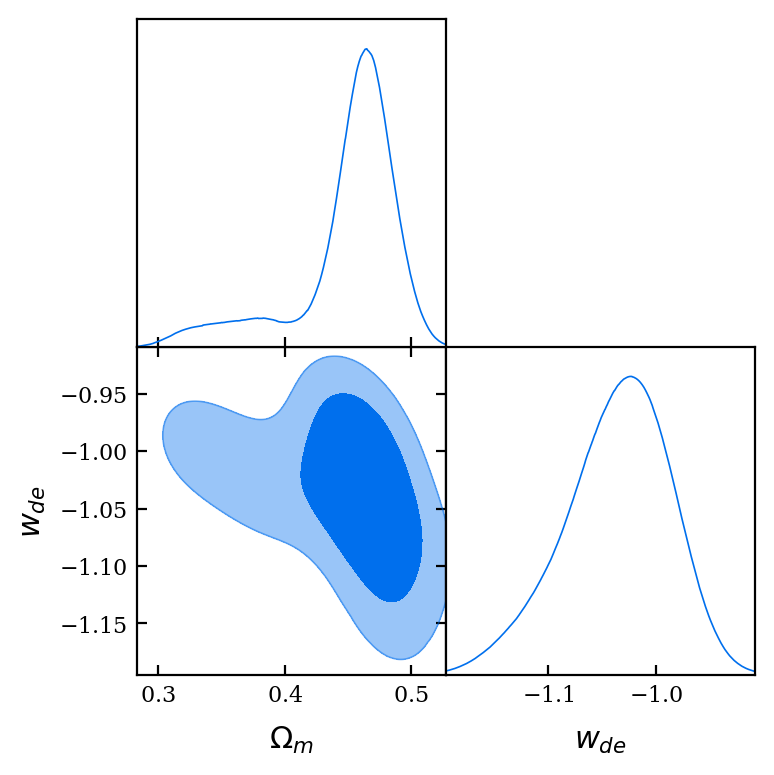

In [ ]:
g_2 = plots.get_subplot_plotter()
g_2.triangle_plot(samples_f_2, filled=True)

In [ ]:
mean_f_2 = np.array([np.mean(Om_sample_f_2),np.mean(wde_sample_f_2)])

mode_f_2 = np.array([sp.stats.mode(Om_sample_f_2)[0],sp.stats.mode(wde_sample_f_2)[0]])

median_f_2 = np.array([np.median(Om_sample_f_2),np.median(wde_sample_f_2)])

std_f_2 = np.array([np.std(Om_sample_f_2),np.std(wde_sample_f_2)])

cov_f_2 = np.array(np.cov(Om_sample_f_2,wde_sample_f_2))

In [ ]:
print("Flat proposal:")
print("Mean Omega_m = ", mean_f_2[0], "       w_de = ", mean_f_2[1])
print("Mode Omega_m = ", mode_f_2[0], "       w_de = ", mode_f_2[1])
print("Median Omega_m = ", median_f_2[0], "       w_de = ", median_f_2[1])
print("Standard deviation Omega_m = ", std_f_2[0], "       w_de = ", std_f_2[1])
print("Covariance Omega_m - w_de = ", cov_f_2)

Flat proposal:
Mean Omega_m =  -1.0352863930278686        w_de =  0.4504905066298956
Mode Omega_m =  -1.0308156164761832        w_de =  0.4241308258166337
Median Omega_m =  -1.0308156164761832        w_de =  0.461185794228544
Standard deviation Omega_m =  0.04717204501718563        w_de =  0.04181089327688631
Covariance Omega_m - w_de =  [[ 0.00222966 -0.00084187]
 [-0.00084187  0.00175165]]
